## Aplicación de la convolución en imágenes

- Operador de Sobel

Sea $B_1 = \underbrace{\begin{bmatrix}
-1 & 0 & 1\\ 
-2 & 0 & 2\\ 
-1 & 0 & 1
\end{bmatrix}}_\text{bordes verticales}$ y $B_2 = \underbrace{\begin{bmatrix}
-1 & -2 & -1\\ 
0 & 0 & 0\\ 
1 & 2 & 1
\end{bmatrix}}_\text{bordes horizontales}$

Sea $A$ una imagen:

\begin{equation}
D_1 = A * B_1
\end{equation}

\begin{equation}
D_2 = A * B_2
\end{equation}

Entonces la matriz E definida

\begin{equation}
\sqrt{(D_1)_{i,j}^2 + (D_2)_{i,j}^2} 
\end{equation}

Es una matriz que detecta los bordes de la imagen $A$.

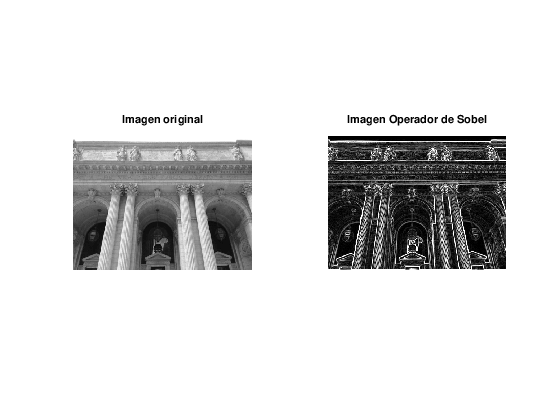

In [1]:
% Ejemplo de convolucion con el Operador de Sobel
clc; clear;
pkg load image;

A = imread('media/Columnas.jpg');
subplot(1, 2, 1);
imshow(A);
title('Imagen original');

% Crear matriz B
B1 = [-1 0 1; -2 0 2; -1 0 1]; % Detectar bordes verticales
B2 = [-1 -2 -1; 0 0 0; 1 2 1]; % Detectar bordes horizontales
A = double(A);
D1 = conv2(A, B1);
D2 = conv2(A, B2);
[m, n] = size(A);
E = sqrt(D1.^2 + D2.^2);
E = uint8(E(2:m+1, 2:n+1));

subplot(1, 2, 2);
imshow(E);
title('Imagen Operador de Sobel');

# Filtros en el Dominio Espacial
**Dominio Espacial.** Se refiere al plano de la imagen original. Los métodos en este dominio se basan directamente en la manipulación de los pixeles de una imagen.

Las transformaciones vistas anteriormente:
- Operaciones Geométricas
- Transformaciones lineales y no lineales
- Uso del histograma
- Convolución

Son ejemplos de métodos aplicados en el dominio especial.

En esta parte del curso se verán un conjunto de métodos, llamados filtros, que permitirán modificar una imagen.
Se entenderá el concepto "filtro" como una operación (mayormente convolución) que se aplica a una imagen $A$ con una matriz $B$, llamada *máscara*.

## Clasificación de los filtros
- Filtros Paso-Bajo (Low-Pass)
Se encargan de atenuar los componentes de alta frecuencia (detalles finos) y preservar componentes de baja frecuencia (detalles gruesos).

- Filtros Paso-Alto (High-Pass)
Se encargan de preservar los componentes de alta frecuencia, con el posible efecto secundario de mejorar los pixeles con ruido.

### Filtros Paso-Bajo
Sea $A \in {\rm I\!R}^{m \times n}$ una imagen a escala de grises. 

#### Filtro Promedio
$B = \dfrac{1}{9} \begin{bmatrix}
1 & 1 & 1\\ 
1 & 1 & 1\\ 
1 & 1 & 1
\end{bmatrix} \quad$ *La suma de las entradas es 1*

$A * B$ da como resultado la imagen filtrada.

- Se pueden generar otras máscaras, cuyo promedio de las entradas debe ser 1.

$B_1 = \begin{bmatrix}
0.075 & 0.125 & 0.075\\ 
0.125 & 0.200 & 0.125\\ 
0.075 & 0.125 & 0.075
\end{bmatrix}$

- Se pueden crear máscaras con tamaño diferene a $3 \times 3$. Eso sí, el promedio de las entradas debe ser uno.

$B_2 = \dfrac{1}{k^2} \begin{bmatrix}
1      & 1      & \ldots & 1\\ 
1      & 1      & \ldots & 1\\ 
\vdots & \vdots & \ddots & 1\\ 
1      & 1      & \ldots & 1
\end{bmatrix} \in {\rm I\!R}^{k \times k}$

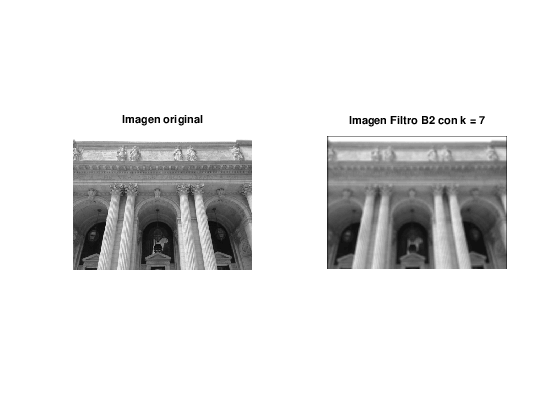

In [2]:
clc; clear;
% Implementacion del filtro B2

% Crear matriz B
k = 7;
B2 = (1/(k^2)) * ones(k, k);

A = imread('media/Columnas.jpg');
subplot(1, 2, 1);
imshow(A);
title('Imagen original');

A = double(A);
C = conv2(A, B2);

[m1, n1] = size(A);
[m2, n2] = size(C);

mitad_m1 = floor(m1 / 2);
mitad_n1 = floor(n1 / 2);

inicio_m = floor((m2 / 2)) - mitad_m1;
final_m  = floor((m2 / 2)) + mitad_m1;
inicio_n = floor((n2 / 2)) - mitad_n1;
final_n  = floor((n2 / 2)) + mitad_n1;

D = uint8(C(inicio_m:final_m, inicio_n:final_n));

subplot(1, 2, 2);
imshow(D);
title(['Imagen Filtro B2 con k = ' num2str(k)]);

#### Filtro Gaussiano
Sea $B \in {\rm I\!R}^{m \times m}$, donde

\begin{equation}
B_{i,j}=e^{\dfrac{-(i^2+j^2)}{2 \sigma^2}}, \sigma \in {\rm I\!R}
\end{equation}

La máscara $B$ se crea a partir de una función gaussiana de 2 dimensiones. El parámetro $\sigma$ controla la forma general de la curva. 

Un ejemplo de aproximación de $B \in {\rm I\!R}^{3 \times 3}$

$B_2 = \dfrac{1}{16} \begin{bmatrix}
1      & 2      & 1\\ 
2      & 4      & 2\\ 
1      & 2      & 1
\end{bmatrix}$

El resultado de la imagen filtrada es $A * B$.

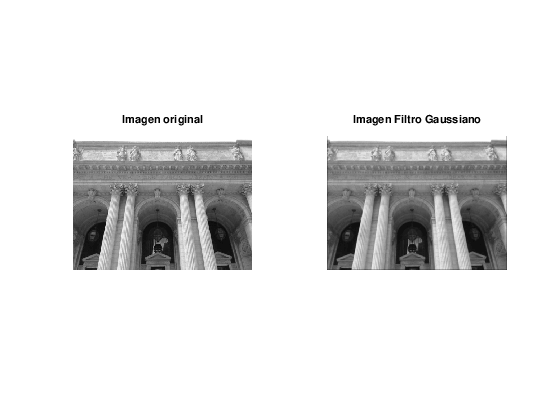

In [3]:
% Filtro Gaussiano - Paso Bajo
clc; clear;
pkg load image;

A = imread('media/Columnas.jpg');
%A = imread('media/bacteria.jpg');
subplot(1, 2, 1);
imshow(A);
title('Imagen original');

% Crear matriz B
B = (1/16)*[1 2 1; 2 4 2; 1 2 1]; % Detectar bordes verticales
[m, n] = size(A);
A = double(A);
C = conv2(A, B);
D = C(2:m+1, 2:n+1);
D = uint8(D);
subplot(1, 2, 2);
imshow(D);
title('Imagen Filtro Gaussiano');

#### Filtro de la Media

Este es un filtro particular, porque no se aplica convolución. Entonces se le conoce como un filtro no lineal.
Este filtro ordena los valores de los pixeles dentro de un vecindario, encontrando el valor medio, y reemplazando el valor del pixel original con la mediana de este vecindario. 

Ejemplo. Considere el bloque

\begin{array}{|c|c|c|} \hline
9 & 12 & 0 \\\hline
5 & \color{red} 4  & 9 \\\hline
8 & 10 & 7 \\\hline
\end{array}

Se desea cambiar el valor de la entrada central con el valor medio de todo el bloque:

1) Ordenar, de mayor a menor, los valores del bloque
\begin{equation}
0 - 4 - 5 - 7 - \underbrace{8}_{\text{mediana}} - 9 - 9 - 10 - 12
\end{equation}

2) Calcular la mediana

La mediana es $8$.

3) Sustitior el valor central del pixel con la mediana, es decir, 8

\begin{array}{|c|c|c|} \hline
9 & 12 & 0 \\\hline
5 & \color{red} 8  & 9 \\\hline
8 & 10 & 7 \\\hline
\end{array}

**Nota.** Este tipo de filtros se utilizan para limpiar una imagen con ruido "sal y pimienta".

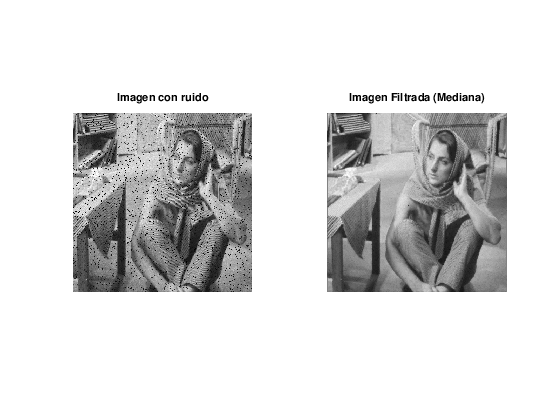

In [4]:
% Filtro de la media
clc; clear;
pkg load image;

A = imread('media/imagen1.jpg');
A = A(:, :, 1);
subplot(1, 2, 1);
imshow(A);
title('Imagen con ruido');

% Filtro de la Mediana
[m, n] = size(A);
B = zeros(m, n);

% Filtro en las esquinas de la imagen
B(1, 1) = median(A(1:2, 1:2)(:)); % Esquina superior-izquierda
B(m, 1) = median(A(m-1:m, 1:2)(:)); % Esquina inferior-izquierda
B(1, n) = median(A(1:2, n-1:n)(:)); % Esquina superior-derecha
B(m, n) = median(A(m-1:m, n-1:n)(:)); % Esquina inferior-derecha

%Filtrado de los bordes laterales
for x = 2:m-1
  B(x, 1) = median(A(x-1:x+1, 1:2)(:)); % Borde izquierdo
  B(x, n) = median(A(x-1:x+1, n-1:n)(:)); % Borde derecho
endfor

% Filtrado de los bordes superior e inferior
for y = 2:n-1
  B(1, y) = median(A(1:2,y-1:y+1)(:)); % Borde superior
  B(1, y) = median(A(m-1:m,y-1:y+1)(:)); % Borde inferior
endfor  

% Calcular el filtro en la parte central de la imagen
for x = 2:m-1
  for y = 2:n-1
    Bloque = A(x-1:x+1, y-1:y+1); % Bloque para calcular la mediana
    vecAux = Bloque(:); % Convertir una matriz en un vector
    B(x, y) = median(vecAux);
  end
end
B = uint8(B);
subplot(1, 2, 2);
imshow(B);
title('Imagen Filtrada (Mediana)');